# Mod 3 Final Project

## Student Info

- Name: Jamaal Smith
- Cohort: 
- Instructor: James Irving, Phd


## Instructions:

- Open and read the project assignment and guidelines in `MOD_PROJECT_README.ipynb`
- Review the hypothesis testing workflow found in this repo's `README.md` and at the bottom of the `MOD_PROJECT_README.ipynb`
- 3 functions from study group/learn.co lessons have been provided inside `functions.py`
    - `Cohen_d`, `find_outliers_IQR`,`find_outliers_Z`

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-mod-3-project-online-ds-ft-100719/master/Northwind_ERD_updated.png">

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

import pandas as pd


fsds_1007219  v0.7.6 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


['[i] Pandas .iplot() method activated.']


# PROJECT

# Hypothesis 1

> Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

- $H_0$: A product's discount has no effect on the quantity of a product in an order
- $H_A$: A product's discount does have an effect on the quantity of a product in an order

In [2]:
import sqlite3
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()
cur.execute("""SELECT * FROM OrderDetail""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [3]:
df['Groups'] = df['Discount']>0
df['Groups'] = df['Groups'].map({True:'Discounted',False:'Full Price'})
df['Groups_Number'] = df['Groups'].map({'Discounted': 1, 'Full Price': 0})
df.head(10)

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Groups,Groups_Number
0,10248/11,10248,11,14.0,12,0.00,Full Price,0
1,10248/42,10248,42,9.8,10,0.00,Full Price,0
2,10248/72,10248,72,34.8,5,0.00,Full Price,0
3,10249/14,10249,14,18.6,9,0.00,Full Price,0
4,10249/51,10249,51,42.4,40,0.00,Full Price,0
5,10250/41,10250,41,7.7,10,0.00,Full Price,0
6,10250/51,10250,51,42.4,35,0.15,Discounted,1
7,10250/65,10250,65,16.8,15,0.15,Discounted,1
8,10251/22,10251,22,16.8,6,0.05,Discounted,1
9,10251/57,10251,57,15.6,15,0.05,Discounted,1


- The data is numerical and we are comparing two groups. Thus, we must employ a 2-sample T-test. TO complete this test, we must make sure that the data meets the following assumptions: no significant outliers, normality and equal variance

## Test for outliers

In [4]:
## To better organize data based on whether an item was full-priced or not, we can create dictionaries
groups = {}
for grp_name in df['Groups'].unique():
    groups[grp_name] = df.groupby('Groups').get_group(grp_name)['Quantity']
groups

{'Full Price': 0        12
 1        10
 2         5
 3         9
 4        40
 5        10
 10       20
 13       40
 14       20
 15       42
 16       40
 19       21
 20       20
 21       35
 22       25
 23       30
 24       15
 25       12
 26       25
 27        6
 28       15
 32       10
 33        1
 35       50
 38       20
 39       20
 41       15
 42        2
 44       28
 47       35
        ... 
 2088      4
 2089     10
 2090     15
 2093     30
 2097     12
 2100     55
 2103      3
 2104     42
 2105     35
 2106      9
 2110     20
 2114     20
 2117      8
 2118     40
 2119     22
 2120    130
 2121     10
 2122     20
 2131      4
 2132      1
 2136      1
 2138      4
 2142      2
 2143      1
 2145      3
 2147      2
 2148      2
 2151      1
 2153      4
 2154      2
 Name: Quantity, Length: 1317, dtype: int64, 'Discounted': 6       35
 7       15
 8        6
 9       15
 11      40
 12      25
 17      15
 18      21
 29      50
 30      65
 31       6
 34

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0, 0.5, 'Density'), Text(0.5, 1.0, 'Quantities Ordered by Price Type')]

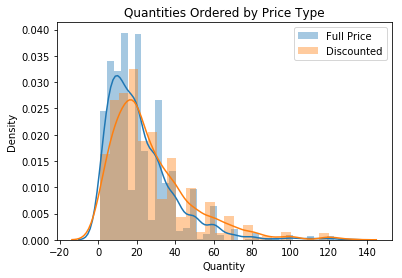

In [5]:
#Visualize the data to get sense of present outlier

for k,v in groups.items():
    sns.distplot(v,label = k)
ax = plt.gca()
ax.legend()
ax.set(title = 'Quantities Ordered by Price Type',ylabel='Density')

In [6]:
from functions import Cohen_d,find_outliers_IQR,find_outliers_Z

In [7]:
#Identifying Outliers

for k,v in groups.items():
    idx_out = find_outliers_Z(v)
    print(f'There are {idx_out} outliers present in {grp_name} using Z-Score')
    groups[k] = v[~idx_out]
    

There are 0       False
1       False
2       False
3       False
4       False
5       False
10      False
13      False
14      False
15      False
16      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
32      False
33      False
35      False
38      False
39      False
41      False
42      False
44      False
47      False
        ...  
2088    False
2089    False
2090    False
2093    False
2097    False
2100    False
2103    False
2104    False
2105    False
2106    False
2110    False
2114    False
2117    False
2118    False
2119    False
2120     True
2121    False
2122    False
2131    False
2132    False
2136    False
2138    False
2142    False
2143    False
2145    False
2147    False
2148    False
2151    False
2153    False
2154    False
Length: 1317, dtype: bool outliers present in Discounted using Z-Score
There are 6       False
7       False
8       False
9       False

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0, 0.5, 'Density'), Text(0.5, 1.0, 'Quantities Ordered by Price Type')]

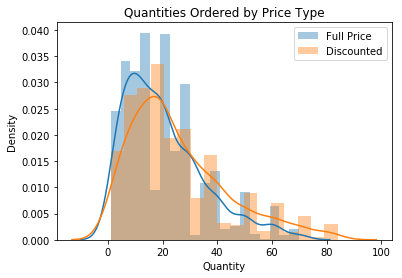

In [8]:
#Replotting of density plot without outliers

for k,v in groups.items():
    sns.distplot(v,label = k)
ax = plt.gca()
ax.legend()
ax.set(title = 'Quantities Ordered by Price Type',ylabel='Density')



## Testing for Normality

In [9]:
import scipy.stats as stats    

In [10]:
#Normalcy test with scipy library
for k,v in groups.items():
    stat,p = stats.normaltest(v)
    print(f' Group {k} Normaltest p-value = {round(p,4)}')
    sig = 'is Not' if p<0.5 else 'is'
    print(f' -The data is {sig} normal')

 Group Full Price Normaltest p-value = 0.0
 -The data is is Not normal
 Group Discounted Normaltest p-value = 0.0
 -The data is is Not normal


In [11]:
#large data sets are ok to be used as long as data set is large
len(groups['Full Price']), len(groups['Discounted'])

(1297, 823)

## Equal Variance

In [12]:
data = []
for k, v in groups.items():
    data.append(v)

stat,p = stats.levene(*data)

print (f'Levene Test for Equal Variance p-value = {round(p,4)}')
sig = 'is Not' if p<0.5 else 'is'
print(f' -The data {sig} equally varied')

Levene Test for Equal Variance p-value = 0.0
 -The data is Not equally varied


- Due to the data not having equal variance, we must use the Welch's test

In [13]:
stat,p = stats.ttest_ind(*data, equal_var=False)
print(f" Welch's t-test p-value is {round(p,4)}")

 Welch's t-test p-value is 0.0


## Effect Size

In [14]:
Cohen_d(*data)

-0.32001140965727837

In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
model = pairwise_tukeyhsd(df['Quantity'],df['Discount'])
model.summary()

group1,group2,meandiff,lower,upper,reject
0.0,0.01,-19.7153,-80.3306,40.9001,False
0.0,0.02,-19.7153,-62.593,23.1625,False
0.0,0.03,-20.0486,-55.0714,14.9742,False
0.0,0.04,-20.7153,-81.3306,39.9001,False
0.0,0.05,6.2955,1.5381,11.053,True
0.0,0.06,-19.7153,-80.3306,40.9001,False
0.0,0.1,3.5217,-1.3783,8.4217,False
0.0,0.15,6.6669,1.551,11.7828,True
0.0,0.2,5.3096,0.2508,10.3684,True
0.0,0.25,6.525,1.3647,11.6852,True


C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



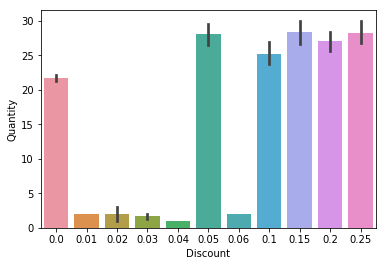

In [16]:
sns.barplot(data=df, x='Discount', y='Quantity',ci=68)

# Hypothesis 2

> Does a shipment's final destination impact the length of time for it to be delivered?

- $H_0$: A shipment's final destination has no impact on the length of time it takes to be delivered.
- $H_A$: A shipment's final destination has an impact on the length of time it takes to be delivered.

In [27]:
import sqlite3
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()
cur.execute("""SELECT OrderDate,RequiredDate,ShippedDate,ShipRegion FROM 'Order';""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,OrderDate,RequiredDate,ShippedDate,ShipRegion
0,2012-07-04,2012-08-01,2012-07-16,Western Europe
1,2012-07-05,2012-08-16,2012-07-10,Western Europe
2,2012-07-08,2012-08-05,2012-07-12,South America
3,2012-07-08,2012-08-05,2012-07-15,Western Europe
4,2012-07-09,2012-08-06,2012-07-11,Western Europe


In [41]:
import datetime as dt



df['ShippedDate'] = pd.to_datetime(df['ShippedDate']) #create column for time needed for item be delivered from order date
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['RequiredDate'] = pd.to_datetime(df['RequiredDate'])

df['Time2Delivery'] = abs(df['RequiredDate'] - df['OrderDate']) #number of days an item takes to ship

df.head()

,OrderDate,RequiredDate,ShippedDate,ShipRegion,Time2Delivery,Days
0,2012-07-04,2012-08-01,2012-07-16,Western Europe,28 days,28
1,2012-07-05,2012-08-16,2012-07-10,Western Europe,42 days,42
2,2012-07-08,2012-08-05,2012-07-12,South America,28 days,28
3,2012-07-08,2012-08-05,2012-07-15,Western Europe,28 days,28
4,2012-07-09,2012-08-06,2012-07-11,Western Europe,28 days,28


In [82]:
df['Days'] = (df['Time2Delivery'] / np.timedelta64(1, 'D')).astype(float) #stack overflow is a god send 
df['Days'].head()

0    28.0
1    42.0
2    28.0
3    28.0
4    28.0
Name: Days, dtype: float64

In theory, if there is no difference in delivery time from when an order is placed until it is shipped, there should be no difference based on geographical region. For simplicity sake, I grouped all ShipRegions that are in Europe and the Americas as one item and all other regions as Other Market. Again, for the null hypothesis to be true, there should be no difference in both means.


In [101]:
#breaking up the groups based on region
df['Groups'] = df['ShipRegion'].str.contains('Europe'or'America')
df['Groups'].astype(int) # used Boolean to prevent error with later tests that require two numbered columns
df['Groups'].head()

0     True
1     True
2    False
3     True
4     True
Name: Groups, dtype: bool

## Test for Outliers

In [61]:
## To better organize data based on whether an item was full-priced or not, we can create dictionaries
groups = {}
for grp_name in df['Groups'].unique():
    groups[grp_name] = df.groupby('Groups').get_group(grp_name)['Days']

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0, 0.5, 'Density'), Text(0.5, 1.0, 'Days Required to Ship to Region')]

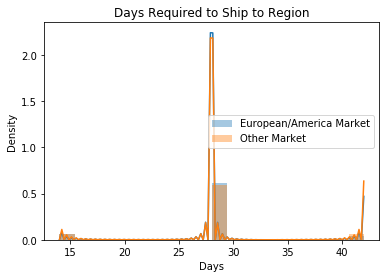

In [62]:
for k,v in groups.items():
    sns.distplot(v,label = k)
ax = plt.gca()
ax.legend()
ax.set(title = 'Days Required to Ship to Region',ylabel='Density')

In [69]:
for k,v in groups.items():
    idx_out = find_outliers_Z(v)
    
print(f'There are {idx_out} outliers present in {grp_name} using Z-Score')
groups[k] = v[~idx_out]

There are 2      False
5      False
8      False
9      False
11     False
13     False
14     False
18     False
20     False
21     False
22     False
23     False
24     False
28     False
35     False
39     False
41     False
42     False
43     False
44     False
45     False
46     False
48     False
50     False
51     False
56     False
57     False
59     False
60     False
61     False
       ...  
776    False
777    False
779    False
782    False
783    False
784    False
786    False
791    False
792    False
794    False
797    False
799    False
800    False
801    False
804    False
806    False
807    False
808    False
809    False
811    False
813    False
815    False
816    False
817    False
818    False
820    False
821    False
823    False
825    False
829    False
Length: 428, dtype: bool outliers present in Other Market using Z-Score


C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0, 0.5, 'Density'), Text(0.5, 1.0, 'Days Required to Ship to Region')]

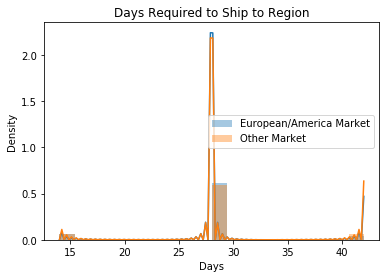

In [68]:
for k,v in groups.items():
    sns.distplot(v,label = k)
ax = plt.gca()
ax.legend()
ax.set(title = 'Days Required to Ship to Region',ylabel='Density')

## Test for Normalcy

In [70]:
import scipy.stats as stats  

In [72]:
#Normalcy test with scipy library
for k,v in groups.items():
    stat,p = stats.normaltest(v)
    print(f' Group {k} Normaltest p-value = {round(p,4)}')
    sig = 'is Not' if p<0.5 else 'is'
    print(f' -The data {sig} normal')

 Group European/America Market Normaltest p-value = 0.0
 -The data is Not normal
 Group Other Market Normaltest p-value = 0.0
 -The data is Not normal


## Equal Variance

In [73]:
data = []
for k, v in groups.items():
    data.append(v)

stat,p = stats.levene(*data)

print (f'Levene Test for Equal Variance p-value = {round(p,4)}')
sig = 'is Not' if p<0.5 else 'is'
print(f' -The data {sig} equally varied')

Levene Test for Equal Variance p-value = 0.3911
 -The data is Not equally varied


In [74]:
stat,p = stats.ttest_ind(*data, equal_var=False)
print(f" Welch's t-test p-value is {round(p,4)}")

 Welch's t-test p-value is 0.4162


## Effect Size

In [75]:
Cohen_d(*data)

-0.05637268405630132

In [104]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
model = pairwise_tukeyhsd(df['Groups'],df['Days'])
model.summary()

group1,group2,meandiff,lower,upper,reject
14.0,28.0,0.0054,-0.1437,0.1546,False
14.0,42.0,-0.0755,-0.2826,0.1317,False
28.0,42.0,-0.0809,-0.2377,0.0759,False


C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



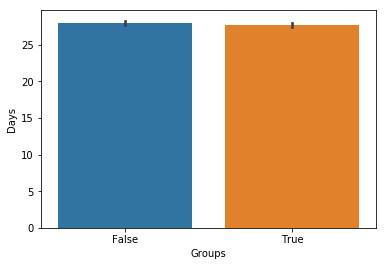

In [106]:
sns.barplot(data=df, x='Groups', y='Days',ci=68)

## Test for Normalcy

# Hypothesis 3

> Does a employee's date of birth have a statistically significant effect on their hire date?

- $H_0$: An employee's date of birth does not have an effect on their hire date.
- $H_A$: An employee's date of birth does have an effect on their hire date.

In [189]:
import sqlite3
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()
cur.execute("""SELECT LastName,FirstName,BirthDate,HireDate FROM Employee;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,LastName,FirstName,BirthDate,HireDate
0,Davolio,Nancy,1980-12-08,2024-05-01
1,Fuller,Andrew,1984-02-19,2024-08-14
2,Leverling,Janet,1995-08-30,2024-04-01
3,Peacock,Margaret,1969-09-19,2025-05-03
4,Buchanan,Steven,1987-03-04,2025-10-17


# Hypothesis 4

> Does a employee's date of birth have a statistically significant effect on their hire date?

- $H_0$: An employee's date of birth does not have an effect on their hire date.
- $H_A$: An employee's date of birth does have an effect on their hire date.

In [212]:
import sqlite3
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()
cur.execute("""SELECT RequiredDate,ShippedDate,Freight,OrderDate FROM 'Order';""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,RequiredDate,ShippedDate,Freight,OrderDate
0,2012-08-01,2012-07-16,32.38,2012-07-04
1,2012-08-16,2012-07-10,11.61,2012-07-05
2,2012-08-05,2012-07-12,65.83,2012-07-08
3,2012-08-05,2012-07-15,41.34,2012-07-08
4,2012-08-06,2012-07-11,51.30,2012-07-09


In [ ]:
import sqlite3
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()
cur.execute("""SELECT RequiredDate,ShippedDate,Freight,OrderDate FROM 'Order';""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()